This notebook does the following:
*  Merge the Topics spreadsheet with the attributes spreadsheet 
*  Identify trends in each topic over time (line plot for each topic)
*  See how the citations are changing 
*  Authors- Country affiliation
*  Authors- Gender
*  Methods and Level of Analysis








Restart Kernel

In [ ]:
import nltk
import numpy as np
import pandas as pd
from nltk import word_tokenize
import re
import seaborn as sns
import matplotlib.pyplot as plt
import smart_open
#from gensim.models import LdaModel
#from gensim.models import CoherenceModel
#import pyLDAvis
#import pyLDAvis.gensim_models as gensimvis
#pyLDAvis.enable_notebook()
import spacy
import numpy as np
#from gensim.models import LdaModel



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Journal_Analysis/"

In [ ]:
topics = pd.read_excel(path + "Final_Topics/Topics_final.xlsx")

In [ ]:
topics.head()

,DOI,Article-title,Topic
0,asqu.2011.56.1.095,"Founding Conditions, Learning, and Organizatio...",Entrepreneurship and venture capital
1,10.1177/0001839215597270,Managing the Unknowable,Entrepreneurship and venture capital
2,10.1177/0001839219843486,Start-up Inertia versus Flexibility: The Role ...,Entrepreneurship and venture capital
3,10.1177/0001839219852349,"Parallel Play: Startups, Nascent Markets, and ...",Entrepreneurship and venture capital
4,10.1177/0001839215591627,Business as Plan B,Entrepreneurship and venture capital


In [ ]:
len(topics)

261

In [ ]:
att = pd.read_excel(path + "Final_Topics/ASQ_Article Attributes 2011-20.xlsx")

In [ ]:
att.tail()

,DOI,Authors,Gender 1st A,Gender Other,Affiliation,US,Canada,Europe,Asia,Other,Article-title,Subtitle,Publication Date,Year,Volume,Issue,Total Citations,Average per Year,Method,Data Source,Analysis Level,Abstract,Unnamed: 22
225,10.1177/0001839220963633,['Lisa Buchter'],1.0,NaN,['emlyon business school'],0.0,0.0,1.0,0.0,0.0,Escaping the Ellipsis of Diversity: Insider Ac...,NaN,NaT,2021,NaN,NaN,0,0.0,Qualitative,Europe,NaN,Researchers have explored in depth how social ...,NaN
226,asqu.2011.56.1.001,Chen-Bo Zhong,0.0,0.0,University of Toronto,0.0,1.0,0.0,0.0,0.0,The Ethical Dangers of Deliberative Decision M...,NaN,2011-03-01,2011,56.0,NaN,122,NaN,NaN,Canada,NaN,Research on ethical decision making has been h...,NaN
227,asqu.2011.56.1.026,"Ji-Yub (Jay) Kim, Jerayr (John) Haleblian, Syd...",0.0,0.0,"INSEAD, University of Georgia, Dartmouth College",1.0,0.0,0.0,1.0,0.0,When Firms Are Desperate to Grow via Acquisiti...,NaN,2011-03-01,2011,56.0,NaN,72,NaN,NaN,US,NaN,In this paper we draw on work in behavioral le...,NaN
228,asqu.2011.56.1.061,Edward Bishop Smith,0.0,0.0,University of Michigan,1.0,NaN,NaN,NaN,NaN,Identities as Lenses: How Organizational Ident...,NaN,2011-03-01,2011,56.0,NaN,76,NaN,NaN,Multi-Country,NaN,This study calls into question the completenes...,NaN
229,asqu.2011.56.1.095,"Gaël Le Mens, Michael T. Hannan, László Pólos",0.0,0.0,Universitat Pompeu Fabra and Barcelona Graduat...,1.0,0.0,1.0,0.0,0.0,"Founding Conditions, Learning, and Organizatio...",NaN,2021-03-11,2011,56.0,NaN,51,NaN,NaN,US,NaN,Empirical evidence about the relation between ...,NaN


In [ ]:
len(att)

230

In [ ]:
att.columns

Index(['DOI', 'Authors', 'Gender 1st A', 'Gender Other', 'Affiliation', 'US',
       'Canada', 'Europe', 'Asia', 'Other', 'Article-title', 'Subtitle',
       'Publication Date', 'Year', 'Volume', 'Issue', 'Total Citations',
       'Average per Year', 'Method', 'Data Source', 'Analysis Level',
       'Abstract', 'Unnamed: 22'],
      dtype='object')

**Trends - topics**

In [ ]:
trends_topics = pd.merge(topics[["DOI", "Topic", "Article-title"]], att[["DOI", "Year"]], on = "DOI", how = "left")

In [ ]:
len(trends_topics)

261

In [ ]:
trends_topics.columns

Index(['DOI', 'Topic', 'Article-title', 'Year'], dtype='object')

In [ ]:
count = trends_topics.groupby(['Topic','Year'])["DOI"].count().reset_index()

In [ ]:
count.rename(columns = {"DOI" : "Count"}, inplace = True)

In [ ]:
count.head()

,Topic,Year,Count
0,Careers and Mobility,2011,1
1,Careers and Mobility,2012,2
2,Careers and Mobility,2013,2
3,Careers and Mobility,2014,1
4,Careers and Mobility,2015,4


In [ ]:
count.groupby("Topic")["Count"].sum()

In [ ]:
count.to_excel(path + "Analysis/topic_trends.xlsx")

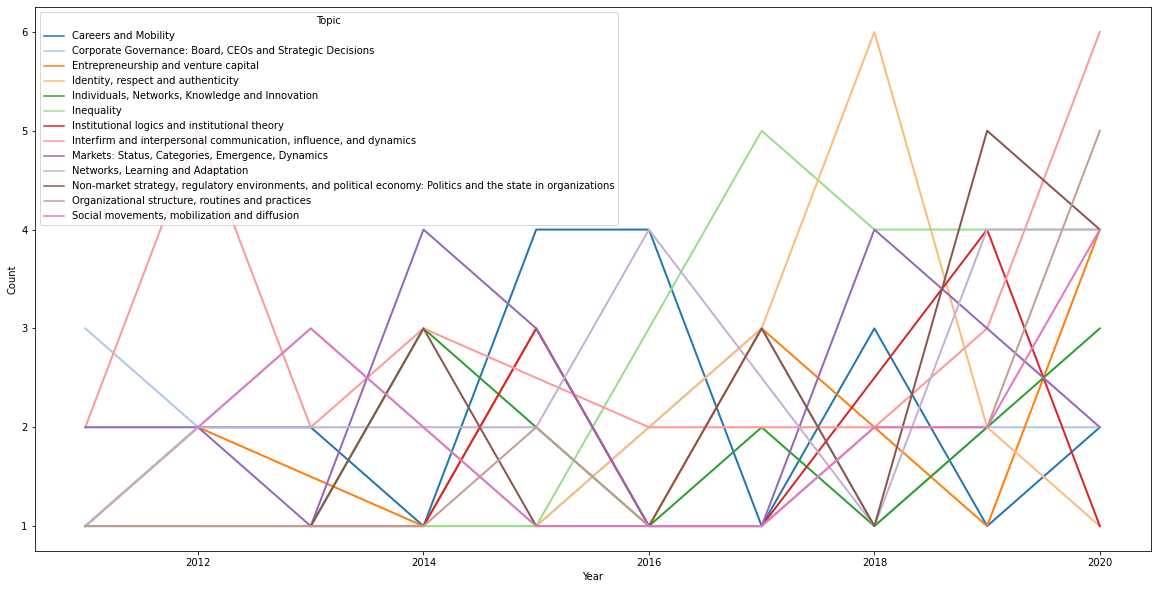

In [ ]:
plt.figure(figsize = (20, 10) )
sns.color_palette("Paired")
sns.lineplot(x = 'Year', y = "Count", hue = "Topic", data = count[(count["Topic"] != "No fit") & (count["Topic"] != "Individual Behavior/Experience") & (count["Topic"] != "Occupational dynamics") & \
                                                                  (count["Topic"] != "Technology,  Work, and Change")], legend = "brief", palette = "tab20", linewidth = 2)

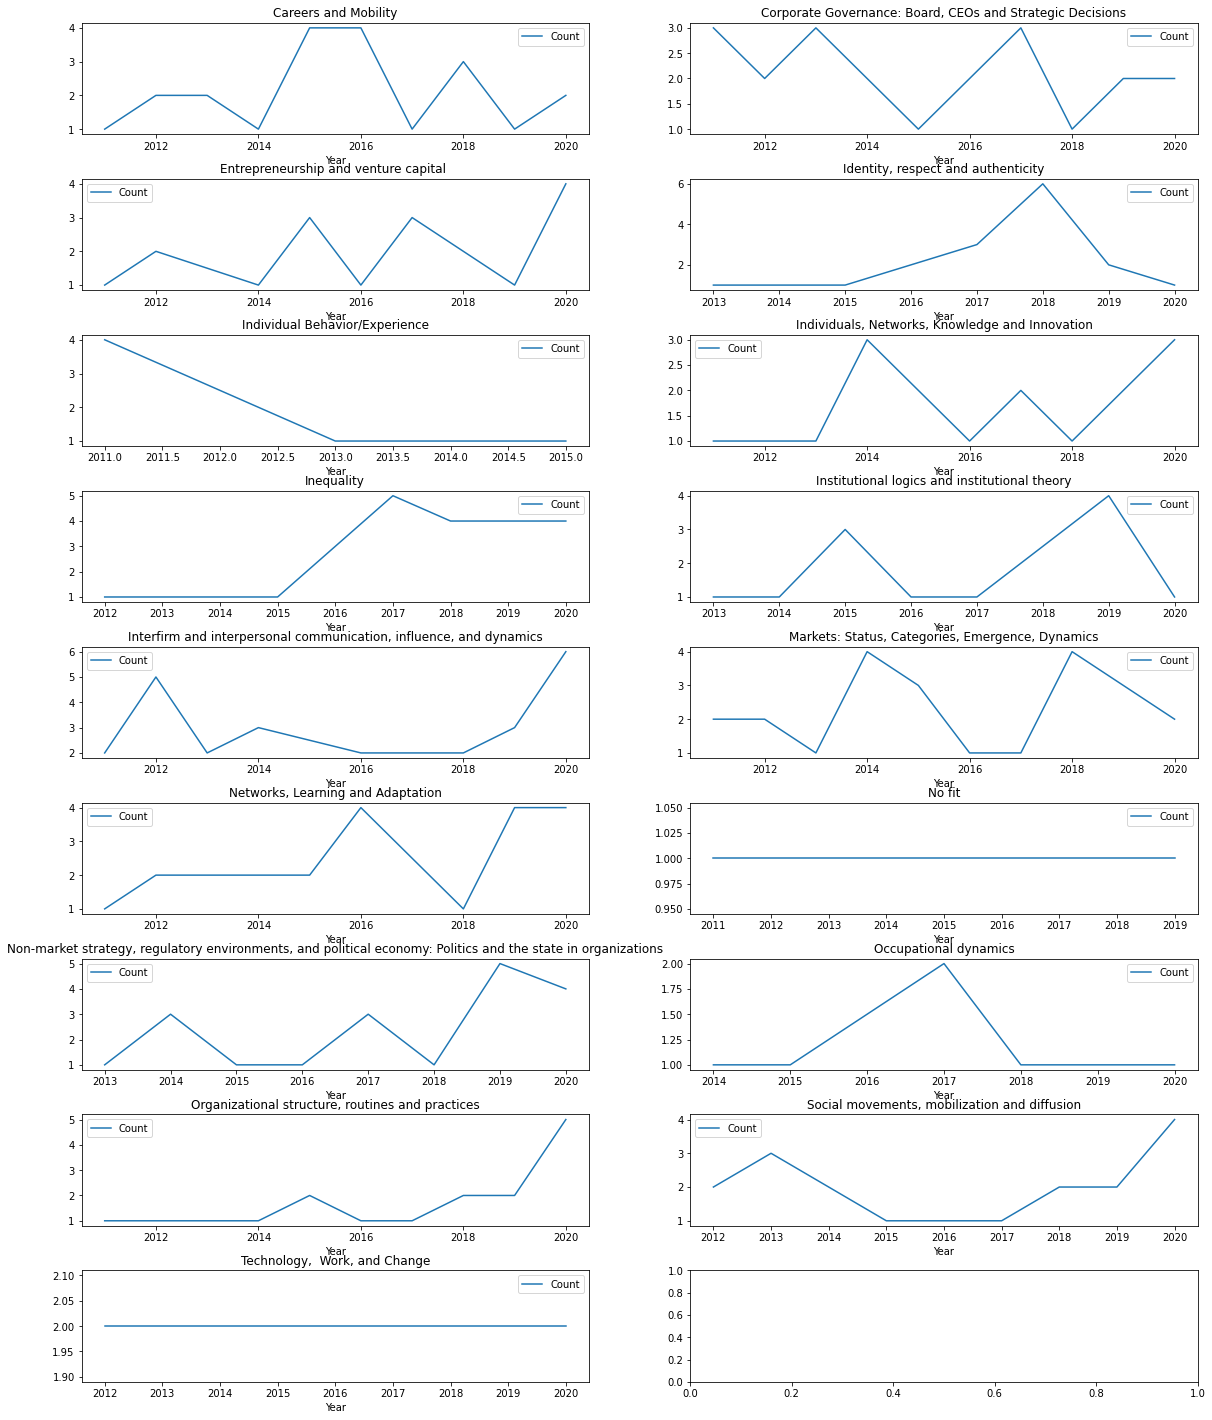

In [ ]:
grouped = count.groupby('Topic')
rowlength = int(grouped.ngroups/2) + 1                        # fix up if odd number of groups
fig, axs = plt.subplots(figsize=(20,25), 
                        nrows=rowlength, ncols= 2,     # fix as above
                        gridspec_kw=dict(hspace=0.4)) # Much control of gridspec

targets = zip(grouped.groups.keys(), axs.flatten())
for i, (key, ax) in enumerate(targets):
    group = grouped.get_group(key)
    group.plot(x='Year', y='Count', ax = ax)  # , kind='line')
    #ax.plot(grouped.get_group(key))
    ax.set_title(key)
ax.legend()
plt.show()

In [ ]:
pd.pivot_table(count,
               index='Year', columns='Topic', values='Count'
              ).plot(subplots=True, figsize = (10, 40) )

**Citations**

In [ ]:
trends_citations = pd.merge(topics[["DOI", "Topic", "Article-title"]], att[["DOI", "Year", 'Total Citations' ]], on = "DOI", how = "left")

In [ ]:
trends_citations

,DOI,Topic,Article-title,Year,Total Citations
0,asqu.2011.56.1.095,Entrepreneurship and venture capital,"Founding Conditions, Learning, and Organizatio...",2011,51
1,10.1177/0001839215597270,Entrepreneurship and venture capital,Managing the Unknowable,2015,85
2,10.1177/0001839219843486,Entrepreneurship and venture capital,Start-up Inertia versus Flexibility: The Role ...,2020,18
3,10.1177/0001839219852349,Entrepreneurship and venture capital,"Parallel Play: Startups, Nascent Markets, and ...",2020,17
4,10.1177/0001839215591627,Entrepreneurship and venture capital,Business as Plan B,2015,80
...,...,...,...,...,...
256,10.1177/0001839213475800,"Social movements, mobilization and diffusion",Punctuated Generosity,2013,91
257,10.1177/0001839218821439,"Social movements, mobilization and diffusion",A Model of Competitive Impression Management: ...,2019,5
258,10.1177/0001839217695089,"Social movements, mobilization and diffusion",Strategic Silence: Withholding Certification S...,2018,47
259,10.1177/0001839215579235,"Social movements, mobilization and diffusion",Social Activism and Practice Diffusion,2015,36


In [ ]:
trends_citations.loc[trends_citations['Year'].between(2011,2014), 'year_bucket'] = '2011 - 2014'
trends_citations.loc[trends_citations['Year'].between(2015,2017), 'year_bucket'] = '2015 - 2017'
trends_citations.loc[trends_citations['Year'].between(2018,2020), 'year_bucket'] = '2018 - 2020'

In [ ]:
trends_citations.to_excel(path + "Analysis/trends_citations.xlsx")

In [ ]:
trends_citations

,DOI,Topic,Article-title,Year,Total Citations,year_bucket
0,asqu.2011.56.1.095,Entrepreneurship and venture capital,"Founding Conditions, Learning, and Organizatio...",2011,51,2011 - 2014
1,10.1177/0001839215597270,Entrepreneurship and venture capital,Managing the Unknowable,2015,85,2015 - 2017
2,10.1177/0001839219843486,Entrepreneurship and venture capital,Start-up Inertia versus Flexibility: The Role ...,2020,18,2018 - 2020
3,10.1177/0001839219852349,Entrepreneurship and venture capital,"Parallel Play: Startups, Nascent Markets, and ...",2020,17,2018 - 2020
4,10.1177/0001839215591627,Entrepreneurship and venture capital,Business as Plan B,2015,80,2015 - 2017
...,...,...,...,...,...,...
256,10.1177/0001839213475800,"Social movements, mobilization and diffusion",Punctuated Generosity,2013,91,2011 - 2014
257,10.1177/0001839218821439,"Social movements, mobilization and diffusion",A Model of Competitive Impression Management: ...,2019,5,2018 - 2020
258,10.1177/0001839217695089,"Social movements, mobilization and diffusion",Strategic Silence: Withholding Certification S...,2018,47,2018 - 2020
259,10.1177/0001839215579235,"Social movements, mobilization and diffusion",Social Activism and Practice Diffusion,2015,36,2015 - 2017


**Authors**

In [ ]:
att.columns

Index(['DOI', 'Authors', 'Gender 1st A', 'Gender Other', 'Affiliation', 'US',
       'Canada', 'Europe', 'Asia', 'Other', 'Article-title', 'Subtitle',
       'Publication Date', 'Year', 'Volume', 'Issue', 'Total Citations',
       'Average per Year', 'Method', 'Data Source', 'Analysis Level',
       'Abstract', 'Unnamed: 22'],
      dtype='object')

In [ ]:
methods = pd.read_excel(path +"Analysis/Methods_new.xlsx")

In [ ]:
methods.head()

,Unnamed: 0,DOI,"Qualitative [interview , ethnograph, qualitative, grounded theory]","Simulation [simulation, formal model]","Experiment [field experiment, lab experiment, experiment, experiments]","Quantitative [regression, quantitative, statistically significant, statistical significance]",Majority_Method
0,0,10.1177_0001839213486759,"[1, 0, 1, 0]","[0, 0]","[0, 0, 0, 0]","[7, 0, 1, 0]",Quantitative
1,1,10.1177_0001839218793128,"[4, 0, 0, 0]","[1, 0]","[0, 0, 0, 0]","[4, 0, 2, 0]",Mixed_Methods
2,2,10.1177_0001839212437519,"[20, 5, 0, 1]","[0, 0]","[0, 0, 1, 2]","[0, 2, 0, 0]",Qualitative
3,3,10.1177_0001839216673823,"[0, 0, 1, 0]","[0, 0]","[0, 0, 0, 0]","[6, 0, 0, 0]",Quantitative
4,4,10.1177_0001839213488773,"[2, 0, 1, 0]","[0, 0]","[0, 0, 0, 0]","[4, 0, 0, 0]",Quantitative


In [ ]:
methods["DOI_new"] = methods["DOI"].apply(lambda x: x.replace("_", "/"))

In [ ]:
methods.drop("DOI", axis = 1, inplace = True)

In [ ]:
methods.rename(columns = {"DOI_new" : "DOI"}, inplace = True)

In [ ]:
merged_methods = pd.merge(methods[["DOI", "Majority_Method"]], att[["DOI", "Year", "Article-title", "Abstract"]], on = "DOI", how = "inner")

In [ ]:
len(merged_methods)

220

In [ ]:
merged_methods["Majority_Method"].value_counts()

Qualitative      90
Quantitative     64
Mixed_Methods    48
Experiment        9
Simulation        7
Name: Majority_Method, dtype: int64

In [ ]:
analysis = pd.read_excel(path + "Analysis/Level_of_Analysis.xlsx")

In [ ]:
analysis_new = analysis[["DOI", "Majority_LoA"]]

In [ ]:
analysis_new["DOI_new"] = analysis_new.apply(lambda x: x["DOI"].replace("_", "/"), axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
analysis_new.drop("DOI", axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
analysis_new.rename(columns = {"DOI_new" : "DOI"}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
merged_methods_analysis = pd.merge(merged_methods, analysis_new, on = "DOI", how = "outer")

In [ ]:
merged_methods_analysis

,DOI,Majority_Method,Year,Article-title,Abstract,Majority_LoA
0,10.1177/0001839213486759,Quantitative,2013,Specialization and Career Dynamics,"In this article, we attempt to resolve the ten...",['Individual']
1,10.1177/0001839218793128,Mixed_Methods,2019,Dispositional Sources of Managerial Discretion...,We investigate the dispositional sources of ma...,['Individual']
2,10.1177/0001839212437519,Qualitative,2011,Transcending Socialization,A nine-year ethnography is used to show how tw...,['Organization/Company']
3,10.1177/0001839216673823,Quantitative,2017,These Unequal States: Corporate Organization a...,In an analysis of data on employment in the 48...,['Organization/Company']
4,10.1177/0001839213488773,Quantitative,2013,"CEO Narcissism, Audience Engagement, and Organ...",We examine the responses of major pharmaceutic...,['Organization/Company']
...,...,...,...,...,...,...
215,10.1177/0001839214523428,Simulation,2014,Finding a Home away from Home,Using data from a sample of foreign subsidiari...,['Industry/Field/Across countries']
216,asqu.2011.56.1.001,Experiment,2011,The Ethical Dangers of Deliberative Decision M...,Research on ethical decision making has been h...,['Individual']
217,asqu.2011.56.1.095,Mixed_Methods,2011,"Founding Conditions, Learning, and Organizatio...",Empirical evidence about the relation between ...,['Organization/Company']
218,10.1177/0001839212461439,NaN,2012,Appeasing Equals,Using archival data on a year of e-mail exchan...,['Organization/Company']


In [ ]:
cols = merged_methods_analysis.columns.tolist()

In [ ]:
cols

['DOI', 'Majority_Method', 'Year', 'Article-title', 'Abstract', 'Majority_LoA']

In [ ]:
merged_methods_analysis = merged_methods_analysis[cols]

In [ ]:
merged_methods_analysis.loc[merged_methods_analysis['Year'].between(2011,2014), 'year_bucket'] = '2011 - 2014'
merged_methods_analysis.loc[merged_methods_analysis['Year'].between(2015,2017), 'year_bucket'] = '2015 - 2017'
merged_methods_analysis.loc[merged_methods_analysis['Year'].between(2018,2021), 'year_bucket'] = '2018 - 2021'

In [ ]:
merged_methods_analysis.to_excel(path + "Analysis/Merged_methods_LoA_new.xlsx")

**Topics Trends and Citations**

In [ ]:
trends_topics_cit = pd.merge(topics[["DOI", "Topic", "Article-title"]], att[["DOI", "Year", "Total Citations"]], on = "DOI", how = "left")

In [ ]:
trends_topics_cit["Year"].unique()

array([2011, 2015, 2020, 2019, 2014, 2012, 2017, 2016, 2013, 2018, 2021])

In [ ]:
trends_topics_cit.loc[trends_topics_cit['Year'].between(2011,2014), 'year_bucket'] = '2011 - 2014'
trends_topics_cit.loc[trends_topics_cit['Year'].between(2015,2017), 'year_bucket'] = '2015 - 2017'
trends_topics_cit.loc[trends_topics_cit['Year'].between(2018,2020), 'year_bucket'] = '2018 - 2020'

In [ ]:
trends_topics_cit.head()

,DOI,Topic,Article-title,Year,Total Citations,year_bucket
0,asqu.2011.56.1.095,Entrepreneurship and venture capital,"Founding Conditions, Learning, and Organizatio...",2011,51,2011 - 2014
1,10.1177/0001839215597270,Entrepreneurship and venture capital,Managing the Unknowable,2015,85,2015 - 2017
2,10.1177/0001839219843486,Entrepreneurship and venture capital,Start-up Inertia versus Flexibility: The Role ...,2020,18,2018 - 2020
3,10.1177/0001839219852349,Entrepreneurship and venture capital,"Parallel Play: Startups, Nascent Markets, and ...",2020,17,2018 - 2020
4,10.1177/0001839215591627,Entrepreneurship and venture capital,Business as Plan B,2015,80,2015 - 2017


In [ ]:
trends_topics_cit.to_excel(path + "Analysis/Topics&Citations.xlsx")

**Analysis- Gender, country, methods**

In [ ]:
att.columns

Index(['DOI', 'Authors', 'Gender 1st A', 'Gender Other', 'Affiliation', 'US',
       'Canada', 'Europe', 'Asia', 'Other', 'Article-title', 'Subtitle',
       'Publication Date', 'Year', 'Volume', 'Issue', 'Total Citations',
       'Average per Year', 'Method', 'Data Source', 'Analysis Level',
       'Abstract', 'Unnamed: 22'],
      dtype='object')

In [ ]:
#Total number of authors
att['Authors_Count'] = att['Authors'].apply(lambda x : len(x.split(",")))

In [ ]:
att_gender = att.pivot_table(index = "Year", values = ("Gender 1st A", 'Gender Other', 'Authors_Count') , aggfunc = 'sum').reset_index()

In [ ]:
att_gender

,Year,Authors_Count,Gender 1st A,Gender Other
0,2011,33,4.0,2.0
1,2012,35,6.0,3.0
2,2013,44,6.0,4.0
3,2014,48,10.0,10.0
4,2015,45,8.0,12.0
5,2016,43,6.0,5.0
6,2017,52,11.0,14.0
7,2018,50,10.0,5.0
8,2019,60,10.0,10.0
9,2020,68,9.0,13.0


In [ ]:
att_country = att.pivot_table(index = "Year", values = ('US',
       'Canada', 'Europe', 'Asia', 'Other'), aggfunc = 'sum')

In [ ]:
country = att_country.reset_index().melt(id_vars = "Year")

In [ ]:
methods_LOA = pd.read_excel(path + "Analysis/Merged_methods_LoA_new.xlsx")

In [ ]:
methods_LOA

,Unnamed: 0,DOI,Majority_Method,Year,Article-title,Abstract,Majority_LoA,year_bucket
0,0,10.1177/0001839213486759,Quantitative,2013,Specialization and Career Dynamics,"In this article, we attempt to resolve the ten...",['Individual'],2011 - 2014
1,1,10.1177/0001839218793128,Mixed_Methods,2019,Dispositional Sources of Managerial Discretion...,We investigate the dispositional sources of ma...,['Individual'],2018 - 2021
2,2,10.1177/0001839212437519,Qualitative,2011,Transcending Socialization,A nine-year ethnography is used to show how tw...,['Organization/Company'],2011 - 2014
3,3,10.1177/0001839216673823,Quantitative,2017,These Unequal States: Corporate Organization a...,In an analysis of data on employment in the 48...,['Organization/Company'],2015 - 2017
4,4,10.1177/0001839213488773,Quantitative,2013,"CEO Narcissism, Audience Engagement, and Organ...",We examine the responses of major pharmaceutic...,['Organization/Company'],2011 - 2014
...,...,...,...,...,...,...,...,...
215,215,10.1177/0001839214523428,Simulation,2014,Finding a Home away from Home,Using data from a sample of foreign subsidiari...,['Industry/Field/Across countries'],2011 - 2014
216,216,asqu.2011.56.1.001,Experiment,2011,The Ethical Dangers of Deliberative Decision M...,Research on ethical decision making has been h...,['Individual'],2011 - 2014
217,217,asqu.2011.56.1.095,Mixed_Methods,2011,"Founding Conditions, Learning, and Organizatio...",Empirical evidence about the relation between ...,['Organization/Company'],2011 - 2014
218,218,10.1177/0001839212461439,NaN,2012,Appeasing Equals,Using archival data on a year of e-mail exchan...,['Organization/Company'],2011 - 2014


In [ ]:
methods = methods_LOA.groupby(["Year", "Majority_Method"])["DOI"].count().reset_index()

In [ ]:
methods

,Year,Majority_Method,DOI
0,2011,Experiment,4
1,2011,Mixed_Methods,3
2,2011,Qualitative,4
3,2011,Quantitative,4
4,2011,Simulation,1
5,2012,Mixed_Methods,9
6,2012,Qualitative,2
7,2012,Quantitative,4
8,2013,Mixed_Methods,3
9,2013,Qualitative,3


In [ ]:
LOA = methods_LOA.groupby(["Year", "Majority_LoA"])["DOI"].count().reset_index()

In [ ]:
LOA

,Year,Majority_LoA,DOI
0,2011,['Individual'],3
1,2011,['Industry/Field/Across countries'],1
2,2011,['Organization/Company'],11
3,2011,['Team/Group'],2
4,2012,['Individual'],1
5,2012,['Industry/Field/Across countries'],2
6,2012,['Organization/Company'],10
7,2012,['Team/Group'],3
8,2013,['Individual'],2
9,2013,['Industry/Field/Across countries'],1


In [ ]:
att_gender.to_excel(path + "Analysis/Analysis_multiple.xlsx")

In [ ]:
import pandas
from openpyxl import load_workbook

book = load_workbook(path + "Analysis/Analysis_multiple.xlsx")
writer = pandas.ExcelWriter(path + "Analysis/Analysis_multiple.xlsx", engine='openpyxl') 
writer.book = book

In [ ]:
methods.head()

,Year,Majority_Method,DOI
0,2011,Experiment,6
1,2011,Mixed_Methods,7
2,2011,Qualitative,2
3,2011,Quantitative,2
4,2012,Experiment,4


In [ ]:
country.to_excel(writer, "Country")

writer.save()

In [ ]:
methods.to_excel(writer, "Method1")
writer.save()

In [ ]:
LOA.to_excel(writer, "LoA2")
writer.save()

**Data Source**

In [ ]:
att.columns

Index(['DOI', 'Authors', 'Gender 1st A', 'Gender Other', 'Affiliation', 'US',
       'Canada', 'Europe', 'Asia', 'Other', 'Article-title', 'Subtitle',
       'Publication Date', 'Year', 'Volume', 'Issue', 'Total Citations',
       'Average per Year', 'Method', 'Data Source', 'Analysis Level',
       'Abstract', 'Unnamed: 22'],
      dtype='object')

In [ ]:
att["Data Source"].unique()

array(['Other Asia', 'Multi-Country', 'US', 'Europe', 'Other', nan,
       'Canada', 'China'], dtype=object)

In [ ]:
att["Data Source"] = att["Data Source"].apply(lambda x: "Asia" if x in ["Other Asia", "China"] else x)

In [ ]:
att["Data Source"].unique()

array(['Asia', 'Multi-Country', 'US', 'Europe', 'Other', nan, 'Canada'],
      dtype=object)

In [ ]:
att_data = att[['Year', 'Data Source', 'DOI']].groupby(["Year", "Data Source"])["DOI"].count().reset_index()

In [ ]:
att_data

,Year,Data Source,DOI
0,2011,Canada,1
1,2011,Multi-Country,2
2,2011,US,14
3,2012,Asia,2
4,2012,Europe,2
5,2012,Multi-Country,3
6,2012,US,9
7,2013,Asia,2
8,2013,Europe,2
9,2013,Multi-Country,1


In [ ]:
att_data.to_excel(writer, "Data Source")
writer.save()

**Number of papers by Year**

In [ ]:
count = att.pivot_table(index = "Year", values = ("DOI") , aggfunc = 'count').reset_index()

In [ ]:
sum(count["DOI"])

230

In [ ]:
count.to_excel(writer, "count")
writer.save()

Save Methods and LoA to a Stata file

In [ ]:
df = pd.read_excel(path + "Analysis/Merged_methods_LoA.xlsx")

In [ ]:
df.drop("year_bucket", axis = 1, inplace = True)

In [ ]:
df.to_stata(path + "Analysis/Merged_methods_LoA.dta", write_index=False, version=118)

/usr/local/lib/python3.7/dist-packages/pandas/io/stata.py:2400: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    Unnamed: 0   ->   Unnamed__0
    Article-title   ->   Article_title

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)

  warnings.warn(ws, InvalidColumnName)


In [ ]:
pd.read_stata(path + "Analysis/Merged_methods_LoA.dta")

,Unnamed__0,DOI,Majority_Method,Year,Article_title,Abstract,Majority_LoA
0,0,10.1177/0001839213486759,Quantitative,2013,Specialization and Career Dynamics,"In this article, we attempt to resolve the ten...",['Individual']
1,1,10.1177/0001839212437519,Qualitative,2011,Transcending Socialization,A nine-year ethnography is used to show how tw...,['Organization/Company']
2,2,10.1177/0001839216673823,Mixed_Methods,2017,These Unequal States: Corporate Organization a...,In an analysis of data on employment in the 48...,['Organization/Company']
3,3,10.1177/0001839213488773,Mixed_Methods,2013,"CEO Narcissism, Audience Engagement, and Organ...",We examine the responses of major pharmaceutic...,['Organization/Company']
4,4,10.1177/0001839219855329,Qualitative,2020,Evaluative Spillovers from Technological Chang...,Most studies of technologies’ impact on occupa...,['Industry/Field/Across countries']
...,...,...,...,...,...,...,...
215,215,10.1177/0001839217707738,Experiment,2018,Routine Regulation: Balancing Conflicting Goal...,To examine how organizational routines serve a...,['Organization/Company']
216,216,10.1177/0001839217718547,Experiment,2018,Renegotiating Spheres of Obligation: The Role ...,"To achieve organization-wide goals, sometimes ...",['Team/Group']
217,217,10.1177/0001839214523428,Simulation,2014,Finding a Home away from Home,Using data from a sample of foreign subsidiari...,['Industry/Field/Across countries']
218,218,asqu.2011.56.1.001,Experiment,2011,The Ethical Dangers of Deliberative Decision M...,Research on ethical decision making has been h...,['Individual']


Create an excel sheet with word counts of methods and LOA along with DOI, Title and Abstract

In [ ]:
df = pd.read_excel(path + "Analysis/Merged_methods_LoA_new.xlsx")

In [ ]:
df.drop("year_bucket", axis = 1, inplace = True)

In [ ]:
methods = pd.read_excel(path + "Analysis/Methods_new.xlsx")

In [ ]:
loa = pd.read_excel(path + "Analysis/Level_of_Analysis.xlsx")

In [ ]:
methods["DOI"] = methods["DOI"].apply(lambda x : x.replace("_", "/"))

In [ ]:
methods.head()

,Unnamed: 0,DOI,"Qualitative [interview , ethnograph, qualitative, grounded theory]","Simulation [simulation, formal model]","Experiment [field experiment, lab experiment, experiment, experiments]","Quantitative [regression, quantitative, statistically significant, statistical significance]",Majority_Method
0,0,10.1177/0001839213486759,"[1, 0, 1, 0]","[0, 0]","[0, 0, 0, 0]","[7, 0, 1, 0]",Quantitative
1,1,10.1177/0001839218793128,"[4, 0, 0, 0]","[1, 0]","[0, 0, 0, 0]","[4, 0, 2, 0]",Mixed_Methods
2,2,10.1177/0001839212437519,"[20, 5, 0, 1]","[0, 0]","[0, 0, 1, 2]","[0, 2, 0, 0]",Qualitative
3,3,10.1177/0001839216673823,"[0, 0, 1, 0]","[0, 0]","[0, 0, 0, 0]","[6, 0, 0, 0]",Quantitative
4,4,10.1177/0001839213488773,"[2, 0, 1, 0]","[0, 0]","[0, 0, 0, 0]","[4, 0, 0, 0]",Quantitative


In [ ]:
df.columns

Index(['Unnamed: 0', 'DOI', 'Majority_Method', 'Year', 'Article-title',
       'Abstract', 'Majority_LoA'],
      dtype='object')

In [ ]:
loa["DOI"] = loa["DOI"].apply(lambda x : x.replace("_", "/"))

In [ ]:
df2 = pd.merge(methods, loa, on = "DOI", how = "outer" )

In [ ]:
df2.columns

Index(['Unnamed: 0_x', 'DOI',
       'Qualitative [interview , ethnograph, qualitative, grounded theory]',
       'Simulation [simulation, formal model]',
       'Experiment [field experiment, lab experiment, experiment, experiments]',
       'Quantitative [regression, quantitative, statistically significant, statistical significance]',
       'Majority_Method', 'Unnamed: 0_y', 'Individual',
       'Industry/Field/Across countries', 'Organization/Company', 'Platform',
       'Team/Group', 'Majority_LoA'],
      dtype='object')

In [ ]:
wordcounts = pd.merge(df, df2[['DOI',
       'Qualitative [interview , ethnograph, qualitative, grounded theory]',
       'Simulation [simulation, formal model]',
       'Experiment [field experiment, lab experiment, experiment, experiments]',
       'Quantitative [regression, quantitative, statistically significant, statistical significance]',
       'Individual',
       'Industry/Field/Across countries', 'Organization/Company', 'Platform',
       'Team/Group'
       ]], on = "DOI", how = "outer")

In [ ]:
wordcounts.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
wordcounts.to_excel(path + "Analysis/merged_methods_loa_wordcounts_new.xlsx")

In [ ]:
wordcounts.to_stata(path + "Analysis/merged_methods_loa_wordcounts_new.dta",write_index=False, version=118)

/usr/local/lib/python3.7/dist-packages/pandas/io/stata.py:2400: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    Article-title   ->   Article_title
    Qualitative [interview , ethnograph, qualitative, grounded theory]   ->   Qualitative__interview___ethnogr
    Simulation [simulation, formal model]   ->   Simulation__simulation__formal_m
    Experiment [field experiment, lab experiment, experiment, experiments]   ->   Experiment__field_experiment__la
    Quantitative [regression, quantitative, statistically significant, statistical significance]   ->   Quantitative__regression__quanti
    Industry/Field/Across countries   ->   Industry_Field_Across_countries
    Organization/Company   ->   Organization_Company
    Team/Group   ->   Team_Group

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and und